<a href="https://colab.research.google.com/github/MHChe/MingHao_Portfolio/blob/main/Visualizing_Filters_of_a_CNN_Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Visualizing Filters of a Convolutional Neural Network

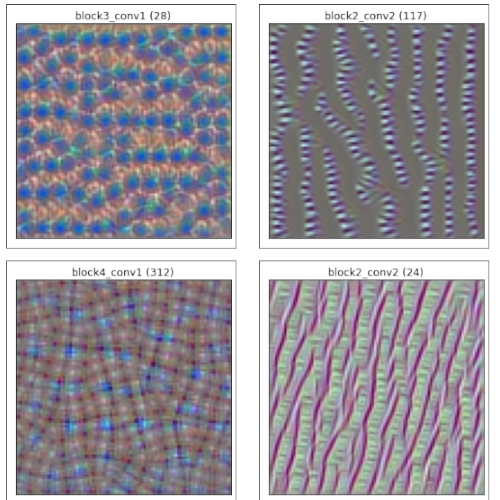

## Task 2: Downloading the Model

In [2]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

print('TensorFlow version', tf.__version__)

TensorFlow version 2.8.2


In [3]:
model = tf.keras.applications.vgg16.VGG16(
    include_top = False, # include three fully connected layers at the top of the network, mainly for classification
    weights = 'imagenet', # pre-trained on imageNet
    input_shape = (96,96,3)
)
model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 48, 48, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 48, 48, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 48, 48, 128)       147584    
                                                              

## Task 3: Get Layer Output

In [4]:
def get_submodel(layer_name):
  return tf.keras.models.Model(
      model.input,
      model.get_layer(layer_name).output
  )

get_submodel('block1_conv2').summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________


## Task 4: Image Visualization

In [5]:
def create_image():
  return tf.random.uniform((96,96,3),minval = -0.5,maxval = 0.5)

def plot_image(image, title = 'random'):
  image = image - tf.math.reduce_min(image) # make it all positive
  image = image/tf.math.reduce_max(image) # scale elements to the range from 0 to 1
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  plt.title(title)
  plt.show()

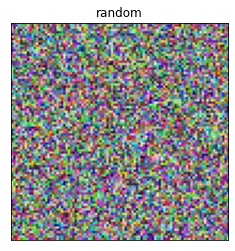

In [6]:
image = create_image()
plot_image(image)

## Task 5: Training Loop

In [7]:
def visualize_filter(layer_name, filter_index=None, iters = 50):
  submodel = get_submodel(layer_name)
  num_filters = submodel.output.shape[-1]

  if filter_index is None:
    filter_index = random.randint(0,num_filters - 1)
  assert num_filters > filter_index, 'filter_index is out of bounds'

  image = create_image()
  verbose_step = int(iters/10)

  for i in range(0,iters):
    with tf.GradientTape() as tape:
      tape.watch(image)
      out = submodel(tf.expand_dims(image, axis=0))[:,:,:,filter_index]
      loss = tf.math.reduce_mean(out)
    grads = tape.gradient(loss, image)
    grads = tf.math.l2_normalize(grads)
    image += grads * 10 # times 10 for having a larger learning rate

    if(i+1)%verbose_step == 0:
      print(f'iteration: {i+1}, Loss: {loss.numpy():.4f}')


  plot_image(image, f'{layer_name},{filter_index}')

## Task 6: Final Results

In [8]:
print([layer.name for layer in model.layers if 'conv' in layer.name])

['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']


iteration: 10, Loss: 66.4085
iteration: 20, Loss: 114.6006
iteration: 30, Loss: 167.9846
iteration: 40, Loss: 229.7707
iteration: 50, Loss: 298.3815
iteration: 60, Loss: 373.3089
iteration: 70, Loss: 451.6823
iteration: 80, Loss: 531.7189
iteration: 90, Loss: 613.1212
iteration: 100, Loss: 695.4095


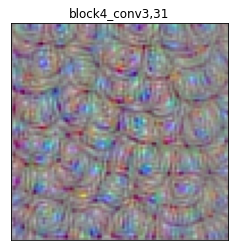

In [20]:
layer_name = 'block4_conv3' #@param ['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']

visualize_filter(layer_name, iters = 100)